## Real Madrid App Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews_all,Sort,app
import json,os,uuid

In [ ]:
# Extracting the reviews from play store about the Real Madrid App.

In [4]:
g_reviews=reviews_all(app_id='com.mcentric.mcclient.MyMadrid',sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                     )
g_reviews

[{'reviewId': '13cd11bf-98c5-4f31-b020-91673b54b8ff',
  'userName': 'Nana yaw Bless jnr',
  'userImage': 'https://play-lh.googleusercontent.com/a/AItbvmlurVhNpeP_Irx4mVWTBlXFoHD2SNyAl6vXjuSa=mo',
  'content': 'Please let me know how much I love 💖.',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2022, 9, 3, 0, 12, 11),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'cdc743d6-71a1-499a-a32b-be9591df5218',
  'userName': 'Chiko man Gundana',
  'userImage': 'https://play-lh.googleusercontent.com/a/AItbvmmlA8JHsz642Jal1FgxcQYN5stWxm1TFTkViyw=mo',
  'content': 'Nice nice',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2022, 9, 2, 20, 38, 42),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'c84b8660-8a33-4ab1-a187-116b59e56d87',
  'userName': 'Qwewjo Sympathy',
  'userImage': 'https://play-lh.googleusercontent.com/a/AItbvml2quof10e8niZLDIJiR43IqTi00LiS4RW1Nl1G=mo',
  'conte

In [ ]:
# Make the extracted data into a data frame.

In [15]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
g_df2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,13cd11bf-98c5-4f31-b020-91673b54b8ff,Nana yaw Bless jnr,https://play-lh.googleusercontent.com/a/AItbvm...,Please let me know how much I love 💖.,5,0,None,2022-09-03 00:12:11,None,NaT
1,cdc743d6-71a1-499a-a32b-be9591df5218,Chiko man Gundana,https://play-lh.googleusercontent.com/a/AItbvm...,Nice nice,5,0,None,2022-09-02 20:38:42,None,NaT
2,c84b8660-8a33-4ab1-a187-116b59e56d87,Qwewjo Sympathy,https://play-lh.googleusercontent.com/a/AItbvm...,Good,5,0,None,2022-09-01 04:14:15,None,NaT
3,73ad6ad8-5f8d-4315-bce3-a607821d460e,Ukatta Bright,https://play-lh.googleusercontent.com/a/AItbvm...,So good,5,0,None,2022-09-01 03:17:57,None,NaT
4,8857117d-694f-40dc-b181-b703b002d8a3,Oluwatoyin amosu Toyin,https://play-lh.googleusercontent.com/a/AItbvm...,Good,5,0,None,2022-08-31 15:50:25,None,NaT


In [52]:
g_df2.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'laguage_code'],
      dtype='object')

In [ ]:
# Rename the columns as appropriate names.

In [16]:
g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description',
                       'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date',
                       'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'

In [ ]:
# From all the collected review, here we we considering recent 500 reviews. so from that i take 5000 reviews from it.

In [18]:
g_df2=g_df2.head(500)

In [24]:
df.shape

(500, 1)

In [19]:
df=g_df2[['review_description']]
df.head()

,review_description
0,Please let me know how much I love 💖.
1,Nice nice
2,Good
3,So good
4,Good


In [20]:
df.describe()

,review_description
count,500
unique,427
top,Good
freq,26


In [ ]:
# from the review there are 427 unique reviews out of 500.
# Good is the most frequent word in the review, ie 26.

In [27]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

In [28]:
# Pre-processing the text into the required format for sentiment analysis.
# remove the puncuations and special charecters.
# convert the all the strings into lower case letter.
# Lemmitization.
# removing the stop words.

In [29]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def preprocessor(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.strip()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([word for word in text.split() if word.isalnum()])
    text = ' '.join([WordNetLemmatizer().lemmatize(word,pos='v') for word in text.split()])    
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

In [32]:
df['review_description']=df['review_description'].apply(preprocessor)
df.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_14464/2602783896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description']=df['review_description'].apply(preprocessor)


,review_description
0,please let know much love
1,nice nice
2,good
3,good
4,good


## Emotion and Sentiment Analysis

In [37]:
from textblob import TextBlob

In [38]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['review_description']]

In [39]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [40]:
df = pd.DataFrame([list(df['review_description']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['review_description', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')

In [47]:
df.head()

,review_description,sentiment_score,sentiment_category
0,please let know much love,0.5,positive
1,nice nice,0.6,positive
2,good,0.7,positive
3,good,0.7,positive
4,good,0.7,positive


In [42]:
df['sentiment_category'].value_counts()

positive    302
neutral     184
negative     14
Name: sentiment_category, dtype: int64

In [54]:
df['sentiment_category'].value_counts(normalize=True)*100

positive    60.4
neutral     36.8
negative     2.8
Name: sentiment_category, dtype: float64

In [ ]:
# From the Real Madrid App, based on recent 500 reviews Majority of the reviews shows a positive Attitude or sentiment towards 
# the functions of the app.


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,8)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


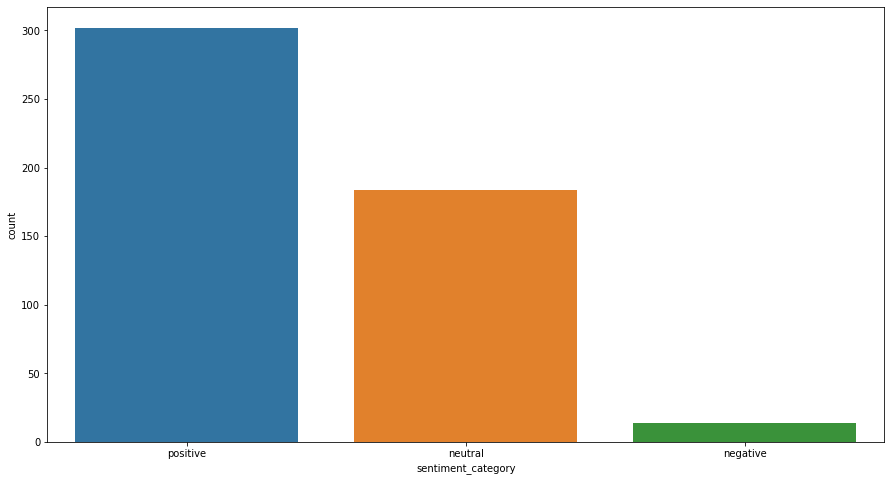

In [51]:
sns.countplot(df.sentiment_category)
plt.show()

In [55]:
# The above count plot Shows the sentiment of recent 500 reviews of the football fans .
# From that  Positive sentiment of  64 %, Negative sentiment of  2.8 % only. Rest  36 % 
# are Neutral. 
